In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

my_decisiontree = DecisionTreeClassifier()
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=5)

In [2]:
df = pd.read_csv('file:///Users/mheroganesyan/Desktop/CS4661-Data%20Science/Project/train.csv')

df[0:10]

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0
5,2,5,1,5,2,13,2,3,3,13,2
6,3,10,4,6,1,4,2,13,4,5,0
7,4,10,3,1,2,13,4,2,4,7,0
8,3,2,4,10,3,3,4,4,1,9,0
9,2,7,3,8,4,8,2,13,2,12,1


In [3]:
feature_cols = ['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']
X = df[feature_cols]  

In [4]:
y = df['hand']
y

0        0
1        0
2        2
3        3
4        0
5        2
6        0
7        0
8        0
9        1
10       0
11       0
12       0
13       1
14       1
15       0
16       1
17       1
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       1
27       0
28       0
29       1
        ..
24980    0
24981    0
24982    0
24983    1
24984    1
24985    1
24986    1
24987    0
24988    3
24989    1
24990    0
24991    2
24992    1
24993    0
24994    0
24995    2
24996    0
24997    1
24998    1
24999    0
25000    0
25001    1
25002    0
25003    0
25004    1
25005    1
25006    0
25007    0
25008    0
25009    1
Name: hand, Length: 25010, dtype: int64

In [5]:
def hearts(x):
    if x == 1:
        return 1
    else:
        return 0

def spades(x):
    if x == 2:
        return 1
    else:
        return 0
    
def diamonds(x):
    if x == 3:
        return 1
    else:
        return 0
    
def clubs(x):
    if x == 4:
        return 1
    else:
        return 0

In [6]:
df['hearts'] = 0 + df['S1'].apply(hearts) + df['S2'].apply(hearts) + df['S3'].apply(hearts) + df['S4'].apply(hearts) + df['S5'].apply(hearts)
df['spades'] = 0 + df['S1'].apply(spades) + df['S2'].apply(spades) + df['S3'].apply(spades) + df['S4'].apply(spades) + df['S5'].apply(spades)
df['diamonds'] = 0 + df['S1'].apply(diamonds) + df['S2'].apply(diamonds) + df['S3'].apply(diamonds) + df['S4'].apply(diamonds) + df['S5'].apply(diamonds)
df['clubs'] = 0 + df['S1'].apply(clubs) + df['S2'].apply(clubs) + df['S3'].apply(clubs) + df['S4'].apply(clubs) + df['S5'].apply(clubs)


In [7]:
def one2two(x,y):
    if x == 1:
        return 1
    else:
        return 0

In [8]:
sub = ['C1','C2','C3','C4','C5']
W = df[sub]  


In [9]:
for i in range(W.shape[0]):
    temp = W.iloc[i]
#     print(temp)
    temp_list = list(temp)
    temp_list.sort()
    for x in range(len(temp)):
#         print(sub_feature[x] + " " + str(temp[x]))
        W.iloc[i][x] = temp_list[x]
    
W[0::16718]

,C1,C2,C3,C4,C5
0,1,2,7,8,9
16718,1,10,11,12,13


In [10]:
def diff(x):
    if x==12:
        return 1
    else:
        return x

In [11]:
df['one2two'] = W['C2'] - W['C1']
df['two2three'] = W['C3'] - W['C2']
df['three2four'] = W['C4'] - W['C3']
df['four2five'] = W['C5'] - W['C4']
#df['five2one'] = (W['C5'] - W['C1']).apply(diff)
df['five2one'] = W['C5'] - W['C1']

In [12]:
feat_cols = ['hearts','spades','diamonds','clubs','one2two','two2three','three2four','four2five','five2one']
X1 = df[feat_cols]  

In [13]:
y1 = df['hand']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=5)

In [15]:
my_RandomForest.fit(X_train, y_train)
y_predict_rf = my_RandomForest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
print("Random Forest accuracy: " + str(accuracy_rf))

Random Forest accuracy: 0.9996801535263073


In [16]:
my_decisiontree.fit(X_train, y_train)
y_predict = my_decisiontree.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

In [17]:
print(accuracy)

0.9996801535263073


In [18]:
prob_rf = my_decisiontree.predict_proba(X_test)

In [19]:
print(prob_rf)
print(y_predict)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[1 2 1 ... 1 2 1]


In [20]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_rf[:,1], pos_label = 1)

In [21]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

1.0


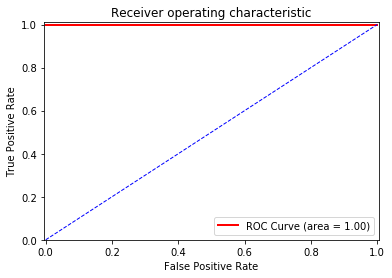

In [22]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()